<a href="https://colab.research.google.com/github/karenyxwang/Big_Data_Analytics/blob/master/Project%205%20-%20Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Homework 5: Deep Learning with MXNet

### Due April 24th, 10 PM EST

Welcome to CIS 545 Homework 5! 

In this homework, we will learn more about the 'new electricity' - Deep Learning (I didn't coin this, Andrew Ng did) ! There are many cool frameworks for building deep learning models - PyTorch, Tensorflow, Theano, MxNet. Since you will be working with Big Data in this course, you need a framework that scales well. Almost all of these have a multi-gpu support built in, MxNet provides the easiest abstractions to do this and works well with AWS. In this assignment, we will be building neural networks in MxNet to solve an interesting problem/

Deep learning or neural network architectures have been used to solve a multitude of problems in various different fields like vision, natural language processing. So let's take a 'deep' dive into it.


![alt text](http://4.bp.blogspot.com/-sLgBLS3bJO8/U__Kx6PnkRI/AAAAAAAAAWM/Gz3cL5jiwTo/s320/godeeper.jpg)





## Why deep learning? 


*   It's coooool
*   Everyone is talking about is these days, People like Siraj Raval can teach it in 5 mins (Check out his youtube channel for some comedy)
*    Deep learning unlocks the treasure trove of unstructured big data for those with the imagination to use it
*   Deep learning models have great representational power and are 'universal approximators'


### Deep Learning Applications:


Deep learning has been significantly improved voice command systems (such as Siri and Alexa), as well as healthcare and image identification.

Deep learning has applications across numerous industries, which is why experts think that this technology is the future of almost everything. There are truly deep learning technologies such as Google’s very human-like talking AI, a new theory that cracks the 'black box' of deep learning, and various budding ideas like this one about why human forgetting might be the key to AI. Here are some cool applications of deep learning - 

Here's a neural network detecting anomalies in Chest Xrays :




![alt text](https://imgur.com/HKPzrzP.jpg)

Most humans can't tell that this is a case of Pleural Effusion {sounds like medical jargon to engineers like us} but this Neural Network model can detect it very well!

Mask RCNNs in action for detecting objects on the road aiding a self driving vehicle's driving: 
![alt text](https://miro.medium.com/max/3864/1*O4wsvh0CHWjP6IrK9HI_Zg.png)

Pretty cool, right? We will be appling CNNs to solve a cool image classification problem.


# Setup Jargon


## Penn Grader Setup
Make sure to initialize the grader with your 8 digit Penn ID.

In [ ]:
%%capture
!pip3 install penngrader

from penngrader.grader import *

VERY IMPORTANT : Enter your **8 digit Penn ID** in the student id field below

PLEASE NOTE: There are some questions, for example making plots, that do not have test cases. All questions without an autograder attached will be manually graded. 

In [ ]:
#PLEASE ENSURE YOUR PENN-ID IS ENTERED CORRECTLY. IF NOT, THE AUTOGRADER WON'T KNOW WHO 
#TO ASSIGN POINTS TO YOU IN OUR BACKEND
STUDENT_ID = 15349478

In [ ]:
grader = PennGrader(homework_id = 'CIS545_Spring_2020_HW5', student_id = STUDENT_ID)

PennGrader initialized with Student ID: 15349478

Make sure this correct or we will not be able to store your grade


**Before you begin**

Please do the following before you begin this homework:

1. Go to AWS dashboard, type in AWS support.

2. Click on create case.

3. Select Service Limit Increase.

4. In Limit Type search for and select Sagemaker.

5. In Region Select US-East (Northern Virgina)

6. In Resource Type select Sagemaker Training.

7. In Limit Select ml.p2.xlarge instances.

8. Set New limit value to 3.

9. Click Add Another request.

10. Select US-East (Northern Virgina) as your region.

11. In resource type select Sagemaker Hosting.

12. Then select ml.m4.xlarge instances.

13. Set new limit as 2.

14. In Use case description enter: Limit Request increase for Homework 5 of University of Pennsylvania class CIS 545: Big Data Analytics.

AWS Support should get back to you in 24-48 hrs. You will only need this for section 1.3 so you can finish up other parts of the homework in the meantime.



## MxNet Installation

In [ ]:
%%capture
!pip3 install mxnet-cu101

In [ ]:
%%capture
!pip3 install --upgrade mxnet-cu101 gluoncv

In [ ]:
import mxnet as mx
from gluoncv.utils import viz
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms
from mxnet import np
import shutil

# Section 1 : Indoor Scene Recognition with MXNet
## 1.1 Lots of Data

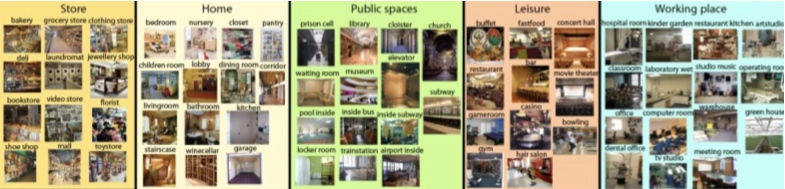

The datset we use is used for the indoor scene recognition problem. Indoor scene recognition is a challenging open problem in high level vision. Most scene recognition models that work well for outdoor scenes perform poorly in the indoor domain. The main difficulty is that while some indoor scenes (e.g. corridors) can be well characterized by global spatial properties, others (e.g., bookstores) are better characterized by the objects they contain. More generally, to address the indoor scenes recognition problem we need a model that can exploit local and global discriminative information.
 
The dataset contains 67 Indoor categories. The number of images varies across categories, but there are at least 100 images per category. All images are in jpg format. 

## Download the dataset
Run the cell below to download the dataset from Google Drive.

In [ ]:
import os
from google.colab import drive

# Mount google drive
DRIVE_MOUNT='/content/gdrive'
drive.mount(DRIVE_MOUNT)


# create folder to write data to
CIS545_FOLDER=os.path.join(DRIVE_MOUNT, 'My Drive', 'CIS545_2020')
HOMEWORK_FOLDER=os.path.join(CIS545_FOLDER, 'HW5')
os.makedirs(HOMEWORK_FOLDER, exist_ok=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Download the data into your google drive. 

You need to run this cell only once. Please comment the code in the cell once the data has been downloaded into your drive.

In [ ]:
 from google_drive_downloader import GoogleDriveDownloader as gdd

 gdd.download_file_from_google_drive(file_id='1A-dYo1ba1mjTrnH6xjzYrg_fO_GxHjvN',
                                   dest_path='/content/gdrive/My Drive/CIS545_2020/HW5/data.zip')

**Upload the "dataset.zip" file in HW5 to a folder called "CIS545_2020" folder in the root folder of your google drive.**


In [ ]:
!unzip "/content/gdrive/My Drive/CIS545_2020/HW5/data.zip"

Streaming output truncated to the last 5000 lines.
  inflating: indoorCVPR_09/Images/studiomusic/studio14.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio16.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio2.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio21.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio87.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio99.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_1.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_2.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_a.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_overall.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studio_pic_for_website.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/studiomusic.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/susustudio.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/trabajo_238115785.jpg  
  inflating: indoorCVPR_09/Images/studiomusic/wideshot_main_st

## 1.1.1 Filter out corrupt and non existant images (5 points)

We have a lot of images in the dataset that aren't valid jpeg images. We need to filter out the invalid images. Complete the check_corrupt function which takes in a filename and returns a boolean indicating if the file is valid. Hint : the PIL library would be useful for this verification!




In [ ]:
base_path = '/content/indoorCVPR_09/Images'
train_path = os.path.join(base_path, 'train/')
test_path = os.path.join(base_path,'test/')
os.makedirs(train_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

train_file = open("/content/TrainImages.txt", "r") 
from PIL import Image

def check_corrupt(filename):
  im = Image.open(filename)
  if im.mode != 'P':
    try:
      im.verify()
      return False
    except Exception:
      return True
  if im.mode == 'P':
    return True

# Check all images in the train file for validity and write the valid ones to train_path
correct_file_count_train = 0
for file in train_file:
    image_path = os.path.join(base_path,file.rstrip('\n'))
    dest_folder = os.path.join(train_path, file.split('/')[0])
    os.makedirs(dest_folder, exist_ok=True)
    dest_path = os.path.join(train_path,file.rstrip('\n'))
    if os.path.getsize(image_path) == 0 or check_corrupt(image_path):
        continue
    correct_file_count_train += 1
    dest = shutil.move(image_path, dest_path)  

correct_file_count_test = 0
test_file = open("/content/TestImages.txt", "r") 
for file in test_file:
    image_path = os.path.join(base_path,file.rstrip('\n'))
    dest_folder = os.path.join(test_path, file.split('/')[0])
    os.makedirs(dest_folder, exist_ok=True)
    dest_path = os.path.join(test_path,file.rstrip('\n'))
    if os.path.getsize(image_path) == 0 or check_corrupt(image_path):
        continue
    correct_file_count_test += 1
    dest = shutil.move(image_path, dest_path)  

In [ ]:
grader.grade('check_file_cleaning', (correct_file_count_train, correct_file_count_test))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.1.2 Build a dataset class (5 points)

Create train and test datasets for loading image files stored in a folder structure within train_path and test_path. Make sure that the image pixels  are floats in range [0,1] and not integers between [0,255] (Hint: transform parameter)

You should name your datasets train_dataset and test_dataset

Read about how you can do it [here](https://beta.mxnet.io/api/gluon/_autogen/mxnet.gluon.data.vision.datasets.ImageFolderDataset.html).


In [ ]:
# TODO: Create train_dataset and test_dataset
train_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(train_path, flag=1, transform= lambda data, label: (data.astype(np.float32)/255, label) )
test_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset(test_path, flag=1, transform= lambda data, label: (data.astype(np.float32)/255, label) )

In [ ]:
sample_train_img, sample_train_label = train_dataset[5]
sample_test_img, sample_test_label = test_dataset[5]
sample_train_img = sample_train_img.asnumpy()
sample_train_label = sample_train_label
sample_test_img = sample_test_img.asnumpy()
sample_test_label = sample_test_label

grader.grade('check_datasets', [sample_train_img,sample_train_label, sample_test_img, sample_test_label])

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


## 1.1.3 Visualize images from the dataset

We have our training and testing datasets but we humans don't really understand binary that well. So let's visualize what our data is by plotting some data points


![alt text](https://www.pathinteractive.com/wp-content/uploads/2018/01/data-mining-img-2-3.jpg)

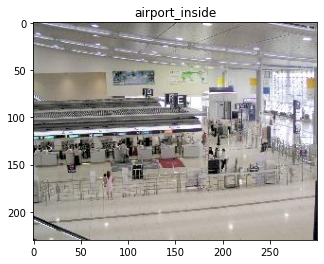

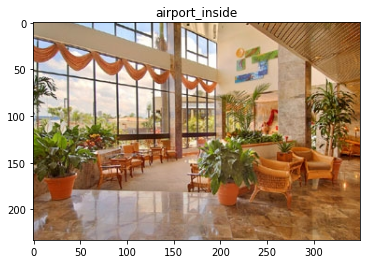

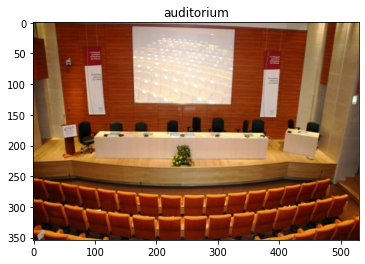

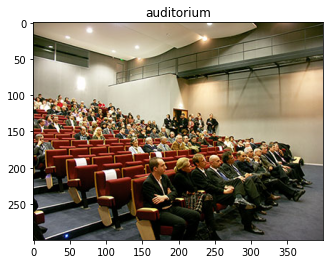

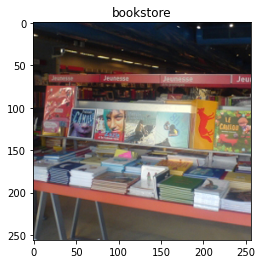

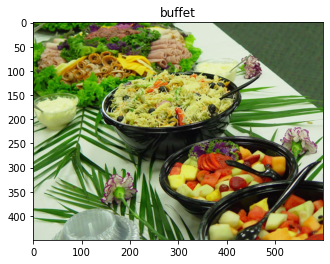

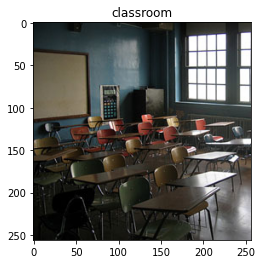

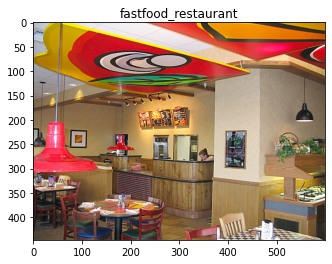

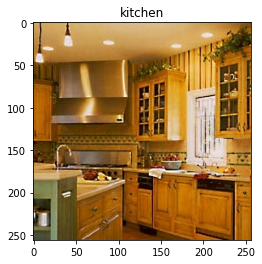

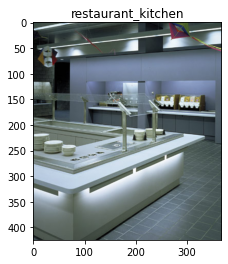

In [ ]:
# Visualize 10 images in the dataset with their label
%matplotlib inline

import matplotlib.pyplot as plt

sample_idxs = [1, 3, 213, 224, 567,779,1052,2000, 3000, 4444]
for sample_idx in sample_idxs:
    data, label = train_dataset[sample_idx]
    plt.imshow(data.asnumpy())
    plt.title(train_dataset.synsets[label])
    plt.show()


We can see that these images are all different sizes and some examples can be really hard to classify - like the airport inside class!

## 1.1.4 Class frequency districutions
Create a frequency distribution of the classes in the training dataset. You should create a dictionary with the number of faces belonging to each of the emotions. The key for the dictionary should be the name of the scene and the value should be the frequency in the train dataset.

In [ ]:
def create_frequency_dict(train_dataset):
    scene_frequency_dict = {}
    #TODO: Create the scene frequency distribution
    for i in range(len(train_dataset)):
        label = train_dataset.synsets[train_dataset[i][1]]
        if label not in scene_frequency_dict.keys():
          scene_frequency_dict.update({label: 0})
        scene_frequency_dict[label] = scene_frequency_dict[label]+1
    return scene_frequency_dict
scene_frequency_dict = create_frequency_dict(train_dataset)
print(scene_frequency_dict)

{'airport_inside': 80, 'artstudio': 80, 'auditorium': 82, 'bakery': 81, 'bar': 82, 'bathroom': 82, 'bedroom': 79, 'bookstore': 80, 'bowling': 80, 'buffet': 79, 'casino': 81, 'children_room': 82, 'church_inside': 81, 'classroom': 82, 'cloister': 80, 'closet': 81, 'clothingstore': 82, 'computerroom': 80, 'concert_hall': 80, 'corridor': 79, 'deli': 81, 'dentaloffice': 79, 'dining_room': 82, 'elevator': 79, 'fastfood_restaurant': 80, 'florist': 81, 'gameroom': 80, 'garage': 81, 'greenhouse': 80, 'grocerystore': 79, 'gym': 82, 'hairsalon': 79, 'hospitalroom': 80, 'inside_bus': 77, 'inside_subway': 79, 'jewelleryshop': 78, 'kindergarden': 80, 'kitchen': 79, 'laboratorywet': 78, 'laundromat': 78, 'library': 79, 'livingroom': 80, 'lobby': 80, 'locker_room': 79, 'mall': 80, 'meeting_room': 78, 'movietheater': 80, 'museum': 77, 'nursery': 80, 'office': 79, 'operating_room': 81, 'pantry': 80, 'poolinside': 79, 'prisoncell': 80, 'restaurant': 80, 'restaurant_kitchen': 77, 'shoeshop': 81, 'stairsca

In [ ]:
grader.grade('check_freq_dists', scene_frequency_dict)

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Does the class distribution look uniform? If yes, we don't need to address class imbalance, if no, what should we do?

## 1.1.5 Create Dataloader objects (5 points)


Data loaders create data batches and perform transformations on the images. 

Since the images are different sizes, we need to resize them to the same value. You should write a transformation to resize the image to 224 x 224. You would also need to add a transformation to convert the image to a tensor - building blocks of neural network operations. Tensors are like numpy arrays with a gradient aspect. 

TLDR, in this section you will need to
 
*   Define a composition of transformations to first resize the image and then convert to tensors
*   Next create train and test data loaders, apply the transformations to the train and test datasets respectively. You will also need to pass in the batch size and whether or not you want to shuffle the data. 

Set shuffle = True for the train and False for the test set. 
Use a batch size of 32 for the train loader and a batch size of 1 for the test set.

[Refer](https://mxnet.apache.org/api/python/docs/api/gluon/data/vision/transforms/index.html#mxnet.gluon.data.vision.transforms.Compose) to the transformation documentation


In [ ]:
from mxnet.gluon.data import DataLoader

# TODO: Define the transformation and the train and test loaders
transformer = transforms.Compose([transforms.Resize(224), transforms.ToTensor()])
train_dataset = train_dataset.transform_first(transformer)
test_dataset = test_dataset.transform_first(transformer)
train_loader = mx.gluon.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = mx.gluon.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
answer = None
for data, label in train_loader:
    answer = data.asnumpy().shape, label.asnumpy().shape
    break

answer2 = None
for data, label in test_loader:
    answer2 = data.asnumpy(), label.asnumpy()
    break

grader.grade('check_loaders', (answer, answer2))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


# 1.2 Let's build classifiers!

We have the data we need to train a scene classifier. We will start simple with a logistic regression classifier as a baseline for our performance before we move onto more complex neural networks. 

## 1.2.1 Logical Logistic Regression - Baseline (20 points)

 Let's first try solving this problem with a Logistic Regression classifier solving the multiclass classification problem.

We will define a logistic regression model in Apache MxNet and train it on our training set and evaluate the performance on the test set

### Model Definition

We will define our first model in mxnet. Read up about gluon and autograd modules and how to use them to create layers in a neural network.

Our first model is a logistic regression model with the number of outputs equal to the number of classes in the model. Complete the construct net function with the logistic regression model definition

In [ ]:
from mxnet import gluon, autograd, ndarray

def construct_net():
    net = mx.gluon.nn.Sequential() # TODO: Initialize a gluon sequential model
    with net.name_scope():
      net = mx.gluon.nn.Dense(units = 67)
      #TODO: Add a gluon dense layer to the model
    return net

net = construct_net()

# Set the context to use the available GPUs, otherwise just use a CPU
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()

Now we need to initialize the model weights and the context, call the net initialize function with Xavier Initialization (sets your starting model weights, read more about it online if you are curious) also set the ctx variable with the context defined above

In [ ]:
net.initialize(mx.init.Xavier(), ctx=ctx)

Let's print the model summary

In [ ]:
x = mx.sym.var('data')
sym = net(x)
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential3_dense0_fwd(FullyConnected)                                      67          data                            
Total params: 67
________________________________________________________________________________________________________________________


In [ ]:
x = net(mx.nd.random.uniform(shape=(32, 3, 224, 224), ctx = ctx))
x = x.asnumpy()
grader.grade('check_log_reg_model', (x.shape, str(net.collect_params())))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Since, this is a multi-class classification problem, we will use the categorical cross-entropy loss function. It is defined as:

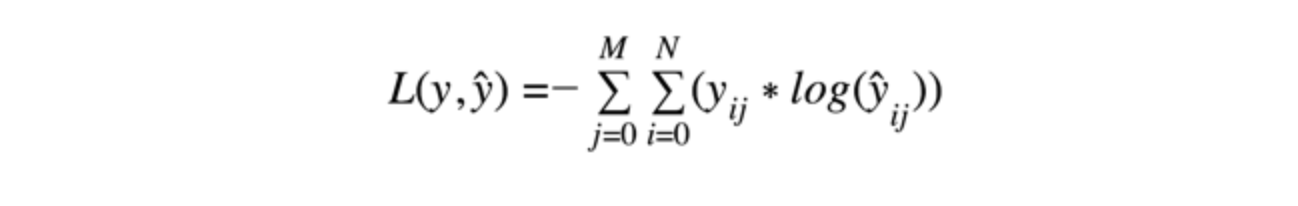

Luckily, we don't have to write it ourselves, we will use the implementation within Mxnet and Gluon.

Let's first define our criterion i.e. the loss function we want to optimize for.

Read more about gluon loss functions [here](https://mxnet.apache.org/api/python/docs/api/gluon/loss/index.html)

In [ ]:
# TODO: Define a gluon Softmax Cross Entropy object, name this 'criterion', 
# the softmax indicates that the loss function does a softmax first to get the probabilities
# and then computes the Cross EntropyLoss
criterion = mx.gluon.loss.SoftmaxCrossEntropyLoss(axis=-1, sparse_label=True, from_logits=False, weight=None, batch_axis=0)

In [ ]:
grader.grade('check_criterion', str(criterion))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Next, we define a trainer object, which includes an optimizer - we will use a stochastic gradient descent optimizer to optimize for our criterion and update our weights. 
We need 3 parameters while defining a gluon optimizer. 


1.   Trainable parameters in the model - net.collect_params() gives you all these parameters
2.   An optimizer - 'sgd' or 'adam', for this task, use stochastic gradient descent aka 'sgd'
3.   Optimizer params - A dictionary with parameters for your optimizer. We only need to specify the learning rate parameter within this dictionary.

The learning rate is a hyperparameter that you should train for. You should start with a small learning rate like 0.001.

Read more about the trainer object [here](https://mxnet.apache.org/api/python/docs/api/gluon/trainer.html).




In [ ]:
trainer = mx.gluon.Trainer(params = net.collect_params(), optimizer = "adam", optimizer_params={'learning_rate': 0.001})

### Train Model

Next, we need to iterate through our training data multiple times to optimize our weights. Each of the iterations is called an epoch. 

We will write a training loop now. Here is the pseudocode for the training loop: 

1. Define an [accuracy metric ](https://mxnet.apache.org/api/python/docs/api/metric/index.html) to measure performance.
1.   Repeat the following for a number of epochs
2.   Iterate through the mini batches in the training dataloader
3.   Each minibatch object will be a tuple (data, labels)
4.   Each minibatch has a number of images and a number of labels (batch size number of images and labels in each minibatch). Thus each data object will be of the shape (BATCH_SIZE, 3, 224, 224). The 3 corresponds to the number of channels - RGB and the labels array would be of size (BATCH_SIZE)
5.   Since our model requires linear inputs and not multiple channels, flatten the image in the batch. The reshape function will help you to do this.
6.   Send the data and label to the GPU. The 'as_in_context' with the ctx defined above will help you to do this.
7.   Compute the model outputs for the flattened data using the net object defined above
8.   Compute the loss function with criterion we previously defined
9.   Compute the accuracy using the metric object defined above.
10.  Backpropogate through the computed loss value. This would compute the gradients for each of the model parameters.
11.  Use a trainer to perform an optimizer step - this updates the weights based on the computed gradients wrt the loss function.
12.  To see how your accuracy improves and the loss decreases, after each epoch print out the accuracy and the loss for that epoch. 


You should also plot your training accuracies and training loss function vs epochs. The plot is worth 5 points!


Train your logistic regression model for 10 epochs.

In [ ]:
from mxnet import gluon, autograd, ndarray

#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
def train_network(net, train_loader, criterion, trainer, metric, epochs = 10):
    #TODO: Define your training loop here
    for e in range(epochs):
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      training_sample = 0
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        data = data.reshape(-1, 3 * 224 * 224)
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output, labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss += loss.sum()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample += data.shape[0]
        trainer.step(data.shape[0])
      loss_sequence.append(loss)
      accuracy_sequence.append(accuracy)
      print(f"For echo {e}, accuracy = {accuracy}, loss = {loss}")
    final_training_accuracy = accuracy #TODO: Set this to final training accuracy
    final_training_loss = loss #TODO: Set this to final testing accuracy
    return final_training_loss, final_training_accuracy

epochs = 10
loss_sequence = []
accuracy_sequence = []
metric = mx.metric.Accuracy() #TODO: Define an accuracy metric
lr_training_loss, lr_training_accuracy = train_network(net, train_loader, criterion, trainer, metric, epochs)

print("Logisitic Regression - the training loss is ", str(lr_training_loss))
print("Logisitic Regression - the training accuracy is ", str(lr_training_accuracy))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide


For echo 0, accuracy = 0.026547018134230698, loss = 4.209035907676834
For echo 1, accuracy = 0.04215741260048607, loss = 4.028267683383233
For echo 2, accuracy = 0.05839097650651212, loss = 3.89787027507485
For echo 3, accuracy = 0.0719760702935128, loss = 3.803051611620509
For echo 4, accuracy = 0.08338007104131613, loss = 3.715306447651572
For echo 5, accuracy = 0.09431669470929145, loss = 3.6420854579902695
For echo 6, accuracy = 0.10426514969420185, loss = 3.5750414454294535
For echo 7, accuracy = 0.11357263039820527, loss = 3.5040831423091316
For echo 8, accuracy = 0.12280592426414075, loss = 3.449878806839446
For echo 9, accuracy = 0.13232379884090484, loss = 3.3871792547717066
Logisitic Regression - the training loss is  3.3871792547717066
Logisitic Regression - the training accuracy is  0.13232379884090484


Text(0, 0.5, 'loss')

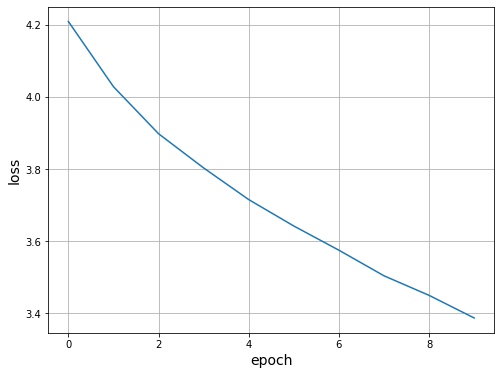

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('loss',fontsize=14)

Text(0, 0.5, 'accuracy')

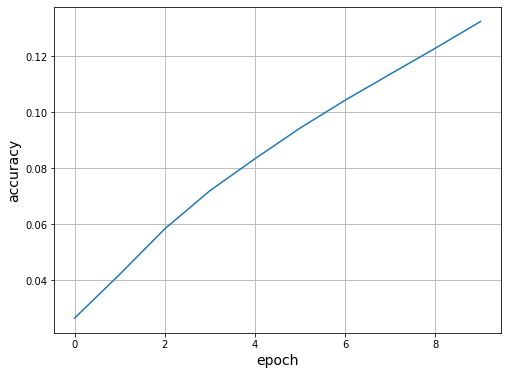

In [ ]:
plt.figure(num=None,figsize=(8, 6))
plt.plot(accuracy_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)

In [ ]:
# Grader Cell : 7 Points
grader.grade('check_lr_train', (lr_training_accuracy, lr_training_loss))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Is your model learning? Is the loss decreasing? Is it able to classifiy better after training?


### Evaluate Model

Evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set.

Note:  Please don't report false numbers for the accuracy as we will be reviewing these manually and if if there is a manipulation with the accuracy computation, you will get a 0 for the entire section.


In [ ]:
def test_model(net, criterion, test_loader, metric):
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    data = data.reshape(-1, 3 * 224 * 224)
    with autograd.record(): 
      output = net(data)
      loss = criterion(output, label)
      predictions = ndarray.argmax(output, axis=1)
      metric.update(preds=predictions, labels=label)     
      accuracy = metric.get()[1]  
    loss.backward()
    loss = ndarray.mean(loss).asscalar()
  testing_accuracy = accuracy 
  testing_loss = loss 
  return testing_loss, testing_accuracy

metric = mx.metric.Accuracy() #TODO: Define an accuracy metric
lr_testing_loss, lr_testing_accuracy = test_model(net, criterion, test_loader, metric)

print("Logisitic Regression - the testing loss is ", str(lr_testing_loss))
print("Logisitic Regression - the testing accuracy is ", str(lr_testing_accuracy))

Logisitic Regression - the testing loss is  4.943115
Logisitic Regression - the testing accuracy is  0.08995502248875563


In [ ]:
# Grader Cell : 8 Points
grader.grade('check_lr_test', (lr_testing_accuracy,lr_testing_loss))

Correct! You earned 5/5 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Does the logistic regression fit well to the data? Think about whether this is underfitting or overfitting? Think about if we need more representational power or we need more regularization to make it better?

## 1.2.2 Feedforward Neural Networks (20 points)

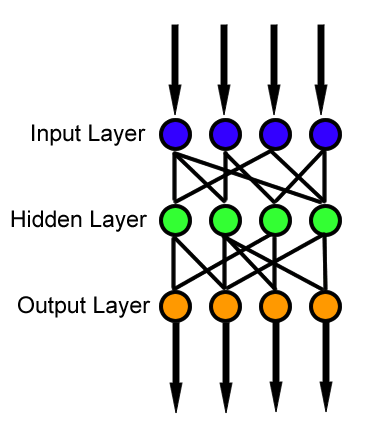

Since logistic regression isn't that great at fitting our classification problem, we need more representation power. We will now define a feedforward neural network


Complete the create_ff_net function below to define a feedforward neural network with atleast 2 hidden layers. Note that the last layer must have the number of classes as the output size. You will also need to initialize the network, create a new trainer object with the parameters of the feedforward network. Use a ReLU activation function for the hidden layers. 


In [ ]:
from mxnet import gluon, autograd, ndarray

def construct_ff_net():
  ff_net = mx.gluon.nn.Sequential()
  # TODO: Create a feedforward network, experiment with the number of hidden layers and
  # the number of sizes of the hidden layers
  with ff_net.name_scope(): #300 - 600
    ff_net.add(gluon.nn.Dense(512, activation="relu"))
    ff_net.add(gluon.nn.Dense(512, activation="relu"))
    ff_net.add(gluon.nn.Dense(67))
  return ff_net
ff_net  = construct_ff_net()

#TODO: Initialize the network
ff_net.collect_params().initialize(mx.init.Xavier(), ctx=ctx)

#TODO: Create a new trainer object for this network
trainer = mx.gluon.Trainer(ff_net.collect_params(), "adam", {'learning_rate': 0.0005}) 

Print the model summary for the fully connected network.

In [ ]:
x = mx.sym.var('data')
sym = ff_net(x)
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
sequential2_dense0_fwd(FullyConnected)                                      512         data                            
________________________________________________________________________________________________________________________
sequential2_dense0_relu_fwd(Activation)                                     0           sequential2_dense0_fwd          
________________________________________________________________________________________________________________________
sequential2_dense1_fwd(FullyConn

Now train this network using the train network function defined above. Create plots for the training accuracy and training loss vs the number of epochs.


In [ ]:
#TODO: Train the feedforward neural network on the training set using the train_network function
def train_network(net, train_loader, criterion, trainer, metric, epochs = 16):
    #TODO: Define your training loop here
    for e in range(epochs):
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      training_sample = 0
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        data = data.reshape(-1, 3 * 224 * 224)
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output, labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss += loss.sum()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample += data.shape[0]
        trainer.step(data.shape[0])
      loss_sequence.append(loss)
      accuracy_sequence.append(accuracy)
      print(f"For echo {e}, accuracy = {accuracy}, loss = {loss}")
    final_training_accuracy = accuracy 
    final_training_loss = loss 
    return final_training_loss, final_training_accuracy

epochs = 16
loss_sequence = []
accuracy_sequence = []
metric = mx.metric.Accuracy()
ffn_training_loss, ffn_training_accuracy = train_network(ff_net, train_loader, criterion, trainer, metric, epochs)

print("Feedforward Neural Networks - the training loss is ", str(ffn_training_loss))
print("Feedforward Neural Networks - the training accuracy is ", str(ffn_training_accuracy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


For echo 0, accuracy = 0.015329968218358572, loss = 4.21191698633982
For echo 1, accuracy = 0.025799214806505887, loss = 4.112491082288548
For echo 2, accuracy = 0.03689163083442388, loss = 3.9884738579481662
For echo 3, accuracy = 0.0451018882034025, loss = 3.908702005169349
For echo 4, accuracy = 0.05178538044494298, loss = 3.862868257625374
For echo 5, accuracy = 0.057393905402879045, loss = 3.799517054757672
For echo 6, accuracy = 0.06308255214592848, loss = 3.7584601305202097
For echo 7, accuracy = 0.06779304542905217, loss = 3.717923649770771
For echo 8, accuracy = 0.07270310130657859, loss = 3.6673956773952097
For echo 9, accuracy = 0.0770611329220415, loss = 3.6189001391747753
For echo 10, accuracy = 0.08169751355393531, loss = 3.5786878391654193
For echo 11, accuracy = 0.08652707671215804, loss = 3.5256954353012726
For echo 12, accuracy = 0.0911888634827502, loss = 3.480148955019648
For echo 13, accuracy = 0.09574553321047993, loss = 3.4260385479041915
For echo 14, accuracy = 

Text(0, 0.5, 'loss')

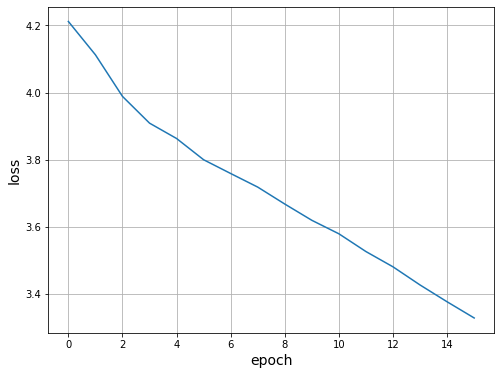

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('loss',fontsize=14)

Text(0, 0.5, 'accuracy')

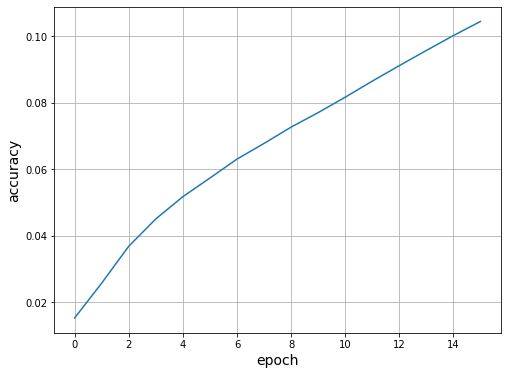

In [ ]:
plt.figure(num=None,figsize=(8, 6))
plt.plot(accuracy_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)

In [ ]:
grader.grade('check_ffn_train', (ffn_training_accuracy,ffn_training_loss))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Once again, evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set

In [ ]:
# TODO: Compute performance on the test set using the test_network function created before
def test_model(net, criterion, test_loader, metric):
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    data = data.reshape(-1, 3 * 224 * 224)
    with autograd.record(): 
      output = net(data)
      loss = criterion(output, label)
      predictions = ndarray.argmax(output, axis=1)
      metric.update(preds=predictions, labels=label)     
      accuracy = metric.get()[1]  
    loss.backward()
    loss = ndarray.mean(loss).asscalar()
  testing_accuracy = accuracy 
  testing_loss = loss 
  return testing_loss, testing_accuracy

metric = mx.metric.Accuracy() #TODO: Define an accuracy metric
ffn_testing_loss, ffn_testing_accuracy = test_model(ff_net, criterion, test_loader, metric)

print("Logisitic Regression - the testing loss is ", str(ffn_testing_loss))
print("Logisitic Regression - the testing accuracy is ", str(ffn_testing_accuracy))

Logisitic Regression - the testing loss is  2.9377987
Logisitic Regression - the testing accuracy is  0.0937031484257871


In [ ]:
grader.grade('check_ffn_test', (ffn_testing_accuracy,ffn_testing_loss))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Does the feedforward network do better than logistic regression? Play around with the network architecture to see how it affects the performance on both the train and test data.

## 1.2.3 Convoluted Convolutional Neural Networks (25 points)
**So, what are CNNs?**

Convolutional Neural Networks are very similar to Feedforward Neural Networks from the previous section: they are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. 

So what changes? ConvNet architectures make the explicit assumption that the inputs are images, which allows us to encode certain properties into the architecture. These then make the forward function more efficient to implement and vastly reduce the amount of parameters in the network.

If you wanna know more about how CNNs function and see some cool visualizations, we would highly recommend [this](http://cs231n.github.io/convolutional-networks/) page


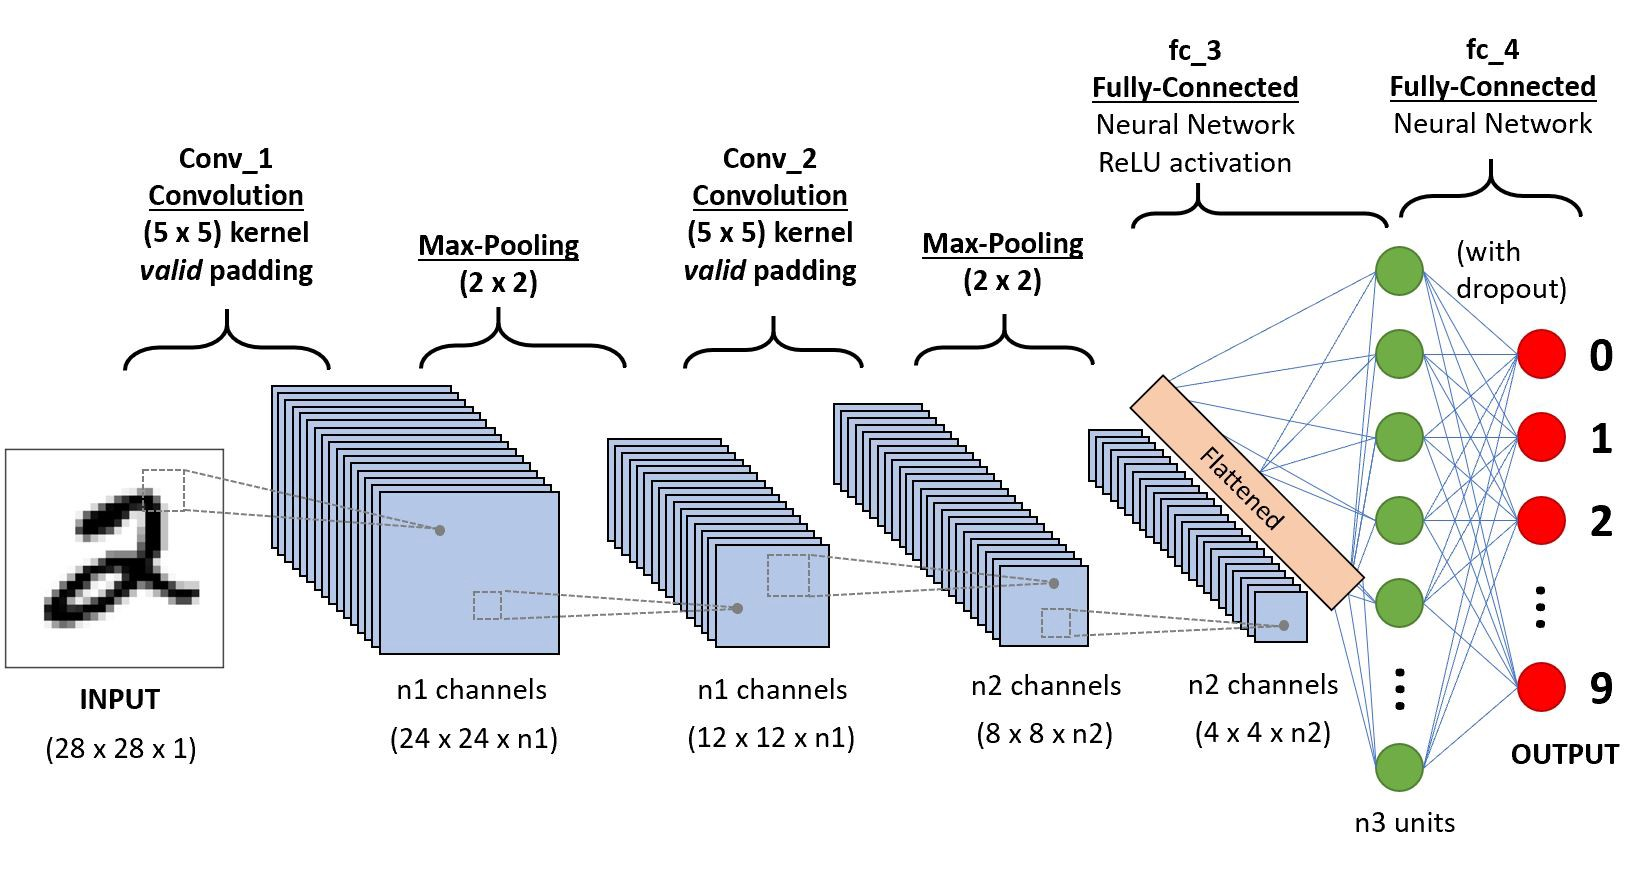


We will define the architecture for the CNN we will be using. The building blocks of CNNs are : 


*   Convolutional Layers
*   Pooling Layers
*   Linear Layers
*   Activation Functions



Define a CNN model with Mxnet and Gluon with one or more blocks, each block having a convolutional layer followed by an activation function and a max pool, flatten the output from the convolutional layers and pass it through one or more fully connected or 'dense' layers and activation functions after all but the last layer. Note that the output shape from the last layer must be the same as the number of classes.


You will need to create a class that extends the gluon.Block class. You need to only implement the forward function, the automatic differentiation module implements the backward propogagtion part.






In [ ]:
import mxnet.ndarray as F
from mxnet.gluon import nn

class ConvNet(gluon.Block):
    def __init__(self, **kwargs):
        super(ConvNet, self).__init__(**kwargs)
        with self.name_scope():
            # layers created in name_scope will inherit name space
            # from parent layer.
            # TODO: Define layers here
            self.conv1 = nn.Conv2D(20, kernel_size=(5,5))
            self.pool1 = nn.MaxPool2D(pool_size=(2,2), strides = (2,2))
            self.conv2 = nn.Conv2D(50, kernel_size=(5,5))
            self.pool2 = nn.MaxPool2D(pool_size=(2,2), strides = (2,2))
            self.conv3 = nn.Conv2D(50, kernel_size=(5,5))
            self.pool3 = nn.MaxPool2D(pool_size=(2,2), strides = (2,2))
            self.fc1 = nn.Dense(512)
            self.fc2 = nn.Dense(67)
    def forward(self, x):
        # TODO: Apply Conv and Pool layers
        # TODO: Reshape to flatten the tensor
        # TODO: Apply fully connected layers
        x = self.pool1(F.tanh(self.conv1(x)))
        x = self.pool2(F.tanh(self.conv2(x)))
        x = self.pool3(F.tanh(self.conv3(x)))
        x = x.reshape((0, -1))
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        return x

Once again, we ask you to create a network, initialize it and create a trainer for it.

In [ ]:
#TODO : Initialize network, initialize the criterion and the trainer
cnn = ConvNet()

cnn.collect_params().initialize(mx.init.Xavier(), ctx=ctx)
trainer = gluon.Trainer(cnn.collect_params(), 'adam', {'learning_rate': 0.00015})
criterion = gluon.loss.SoftmaxCrossEntropyLoss()

In [ ]:
#Grader Cell - Worth 10 points
grader.grade('check_cnn_model', (str(cnn.collect_params())))

Correct! You earned 10/10 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Write another function to train a convolutional neural network on the train data given the network, trainer and criterion. Train the CNN for 10 epochs. Plot the training loss and accuracy curves.

Note that there will be a slight difference from training a feedforward network cause here you will the image information in separate chanels as the input rather than a single flattened input.

In [ ]:
from mxnet import gluon, autograd, ndarray

#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
def train_cnn(net, train_loader, criterion, trainer, metric, epochs = 10):
    #TODO: Define your training loop here
    for e in range(epochs):
      cumulative_loss = mx.nd.zeros(1, ctx=ctx)
      training_sample = 0
      for i, (data, label) in enumerate (train_loader):
        data = data.as_in_context(ctx)
        label = label.as_in_context(ctx)       
        with autograd.record(): 
          output = net(data)
          loss = criterion(output, label)
          metric.update(preds=output, labels=label)     
          accuracy = metric.get()[1]  
        loss.backward()
        cumulative_loss += loss.sum()
        loss = cumulative_loss.asscalar()/training_sample
        training_sample += data.shape[0]
        trainer.step(data.shape[0])
      loss_sequence.append(loss)
      accuracy_sequence.append(accuracy)
      print(f"For echo {e}, accuracy = {accuracy}, loss = {loss}")
    final_training_accuracy = accuracy 
    final_training_loss = loss
    return final_training_loss, final_training_accuracy

epochs = 10
loss_sequence = []
accuracy_sequence = []
metric = mx.metric.Accuracy()
cnn_training_loss, cnn_training_accuracy = train_cnn(cnn, train_loader, criterion, trainer, metric, epochs)

print("Convoluted Neural Networks - the training loss is ", str(cnn_training_loss))
print("Convoluted Neural Networks - the training accuracy is ", str(cnn_training_accuracy))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


For echo 0, accuracy = 0.032903346419891566, loss = 4.118452060722305
For echo 1, accuracy = 0.044120396335763694, loss = 3.9572710048652695
For echo 2, accuracy = 0.05564903097152116, loss = 3.8392154899186
For echo 3, accuracy = 0.06669470929145635, loss = 3.706669059342253
For echo 4, accuracy = 0.08483828753037952, loss = 3.5078369871584956
For echo 5, accuracy = 0.10861843335202842, loss = 3.301001999906437
For echo 6, accuracy = 0.137435568731138, loss = 3.1054314710422903
For echo 7, accuracy = 0.17356047859412974, loss = 2.9369086533963324
For echo 8, accuracy = 0.21356016700940986, loss = 2.8057824780127247
For echo 9, accuracy = 0.2586838661432043, loss = 2.703984791647174
Convoluted Neural Networks - the training loss is  2.703984791647174
Convoluted Neural Networks - the training accuracy is  0.2586838661432043


Text(0, 0.5, 'loss')

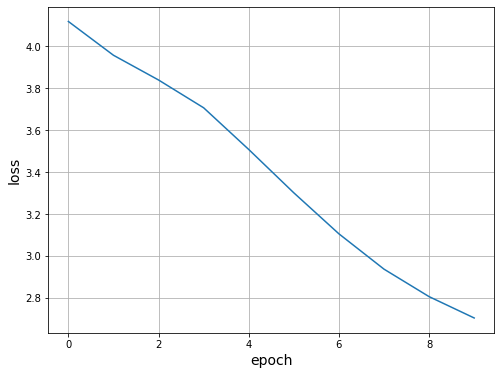

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('loss',fontsize=14)

Text(0, 0.5, 'accuracy')

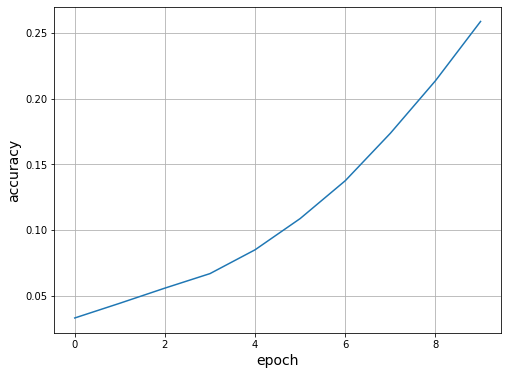

In [ ]:
plt.figure(num=None,figsize=(8, 6))
plt.plot(accuracy_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('accuracy',fontsize=14)

In [ ]:
grader.grade('check_cnn_train', (cnn_training_accuracy, cnn_training_loss))

Correct! You earned 7/7 points. You are a star!

Your submission has been successfully recorded in the gradebook.


Once again, evaluate the model performance on the test set. Compute the cross entropy loss and accuracy on the test set

In [ ]:
# TODO: Compute performance on the test set, you may need to write a new function modifying test_network without the flattening aspect

def test_model(net, criterion, test_loader, metric):
  for i, (data, label) in enumerate (test_loader):
    data = data.as_in_context(ctx)
    label = label.as_in_context(ctx)       
    with autograd.record(): 
      output = net(data)
      loss = criterion(output, label)
      metric.update(preds=output, labels=label)    
      accuracy = metric.get()[1]  
    loss.backward()
    loss = ndarray.mean(loss).asscalar()
  testing_loss = loss 
  testing_accuracy = accuracy 
  return testing_loss, testing_accuracy

metric = mx.metric.Accuracy()
cnn_testing_loss, cnn_testing_accuracy = test_model(cnn, criterion, test_loader, metric)

print("Convoluted Convolutional Neural Networks - the testing loss is ", str(cnn_testing_loss))
print("Convoluted Convolutional Neural Networks - the testing accuracy is ", str(cnn_testing_accuracy))

Convoluted Convolutional Neural Networks - the testing loss is  4.153549
Convoluted Convolutional Neural Networks - the testing accuracy is  0.08470764617691154


In [ ]:
grader.grade('check_cnn_test', (cnn_testing_accuracy, cnn_testing_loss))

Correct! You earned 8/8 points. You are a star!

Your submission has been successfully recorded in the gradebook.


How does the CNN perform? Does it out perform feedforward network?

Print out the number of learned parameters for the CNN and for the FFN. Does the CNN have more parameters? Think about how this links to performance and how CNN is so powerful?

# 1.3 Training on multiple GPU's using AWS SageMaker (20 points)

Note that this section will be graded manually!


We have given you a script called train.py which trains a sophisticated deep learning architecture called resnet on the indoor scenes dataset. Given its a huge architecture it will be very slow to train on a single GPU. Now we will see how to scale such learning tasks up using multiple GPU's. 

We will achieve this using a technique called data parallelism:

![Calculation of minibatch stochastic gradient using data parallelism and two GPUs.](http://d2l.ai/_images/data-parallel.svg)

Assume that there are  k  GPUs on a machine. Given the model to be trained, each GPU will maintain a complete set of model parameters independently. Training proceeds as follows:

* In any iteration of training, given a random minibatch, we split the examples in the batch into  k  portions and distribute them evenly across the GPUs.

* Each GPU calculates loss and gradient of the model parameters based on the minibatch subset it was assigned and the model parameters it maintains.

* The local gradients of each of the  k  GPUs are aggregated to obtain the current minibatch stochastic gradient.

* The aggregate gradient is re-distributed to each GPU.

* Each GPU uses this minibatch stochastic gradient to update the complete set of model parameters that it maintains.


The script we have given calls the MXNet API's which enable this behavior. We will now use AWS Sagemaker's MxNet API to run this script on Multiple GPU's. To achieve this:

1. Create a S3 bucket named sagemaker followed by timestamp and then create a folder within that called dataset.

2. Then upload the .lst, .rec and .idx files you generated to the folder.

3. Go to the AWS dashboard and search for Sagemaker.

4. Click dashboard, then click Notebook instances and click create notebook instance. Give it a name, chose an instance type based on how fast you want your cpu compute to be and how much you want to spend on credits, details on pricing can be found here. (Select a t type instance)

5. In IAM role section create a new role that provides your notebook access to S3 buckets with sagemaker in the name, you don't have to create a role yourself, just clicking on the create role button will create it for you.


6. Click create notebook instance and within 5-10 mins a notebook instance will be created.

7. After that is done, click on "Open Jupyter" and go through then upload the notebook MXnet.ipynb by clicking the upload button.

8. Fill the specific sections of the notebook as instructed and run each cell.

9. In case you get ResourceLimitExceeded exception while running the notebook, it means you have not done the AWS support steps mentioned at the beginning of the notebook.and requested for an increase in quota for gpu instances. I would recommend requesting 4 p2.xlarge instances for training and 2 c4.xlarge instances for other things.

10. Do not, I repeat do not forget to STOP your notebook instance after you are done with it. If you forget to do that, you will burn out your credits.

That ends this section. You taught your deep learning model how to recognize scenes. You obviously are a star!


The next section will teach you how to work with sequential data such as text, sounds, trajectories etc. We will be pivoting to a different sequential dataset for the next part. 

# Section 2: Sequential Data
Just kidding, we are cutting out the next section in order to give you enough time to focus on the project. Good Luck!

P.S. For those who are interested, the next part was gonna be emotion detection in texts using RNNs and LSTMs with GloVE word embeddings. 

Here's a short description: 

We will be teaching our model to learn the emotion from text data. We will implement a model which inputs a sentence (for example "I had so much fun at lunch with the CIS545 TAs") and finds the most appropriate emoji from a set of emojis to be used with this sentence ( 😄/🍴 )




In [ ]:
# If you want to know how to render emojis in the ipynb notebook, you might find this interesting:

!pip install emoji 
import emoji

# The emojis labels we were going to use
emoji_map = {"0": ":heart:",    
                    "1": ":baseball:",
                    "2": ":smile:",
                    "3": ":disappointed:",
                    "4": ":fork_and_knife:"}

# let's see what the emojis render as in Colab!
for i in emoji_map:
    print(i, " -> ", emoji.emojize(emoji_map[i], use_aliases= True))


![It's over!](http://www.quickmeme.com/img/7f/7f77546945f948560cdc26b12b99d5ccd390c2e39d2849d3423ae7608dac066a.jpg)